In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("/home/emil/Downloads/ks-projects-201801.csv")

## Remove unwanted columns and rows from gathered data

In [3]:
data = data.drop(columns=['goal', 'usd pledged', 'pledged'])

In [4]:
data = data.loc[(data['state'] == 'successful') | (data['state'] == 'failed')]

## Missing values check

In [5]:
data.isnull().sum()

ID                  0
name                3
category            0
main_category       0
currency            0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

## Distributions of categorical values

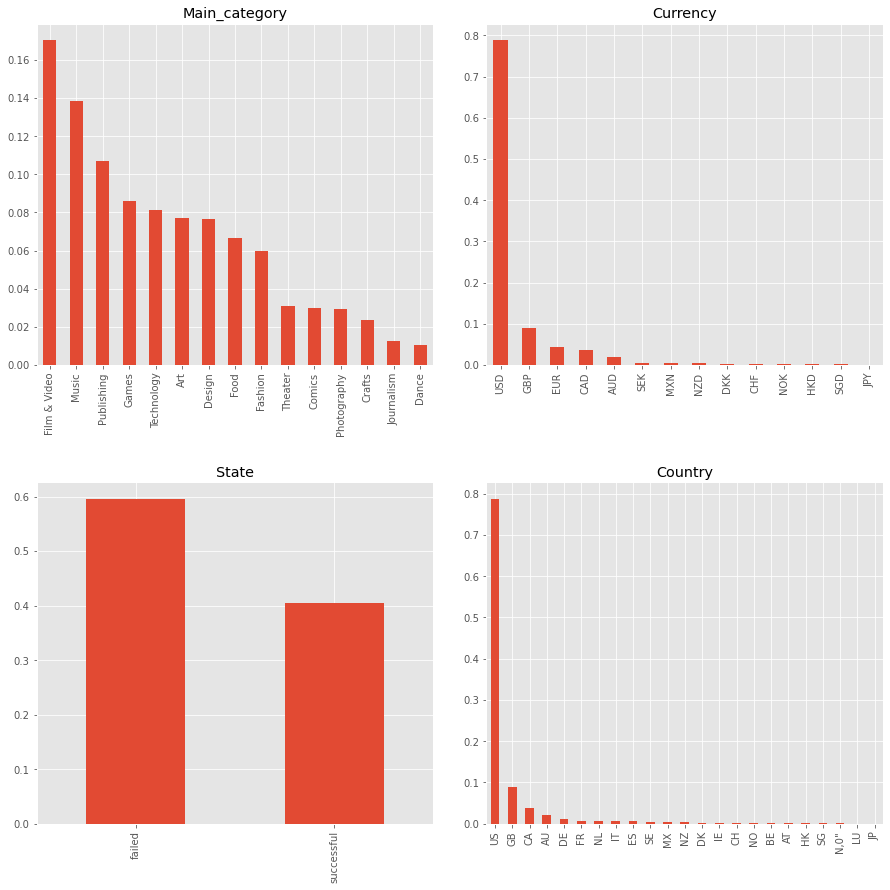

In [6]:
categorical_cols = ['main_category', 'currency', 'state', 'country']
fig = plt.figure(figsize=(13,13))
i = 1
for col in categorical_cols:
    ax = fig.add_subplot(2, 2, i)
    ax.set_title(col.capitalize())
    data[col].value_counts(normalize=True).plot(kind="bar", ax=ax)
    i += 1
fig.tight_layout(pad=3.0)

In [53]:
data["category"].describe()

count             331675
unique               159
top       Product Design
freq               18680
Name: category, dtype: object

In [55]:
data["category"].value_counts()

Product Design     18680
Documentary        14523
Music              12633
Tabletop Games     11744
Shorts             11394
                   ...  
Residencies           68
Letterpress           46
Chiptune              33
Literary Spaces       19
Taxidermy             10
Name: category, Length: 159, dtype: int64

## Distributions of numeric values

In [56]:
data.describe().drop(columns=["ID"]).apply(lambda s: s.apply('{0:.1f}'.format))

,backers,usd_pledged_real,usd_goal_real
count,331675.0,331675.0,331675.0
mean,116.4,9943.5,41510.0
std,965.4,96732.9,1108929.7
min,0.0,0.0,0.0
25%,2.0,50.0,2000.0
50%,15.0,788.0,5000.0
75%,63.0,4608.0,15000.0
max,219382.0,20338986.3,166361390.7


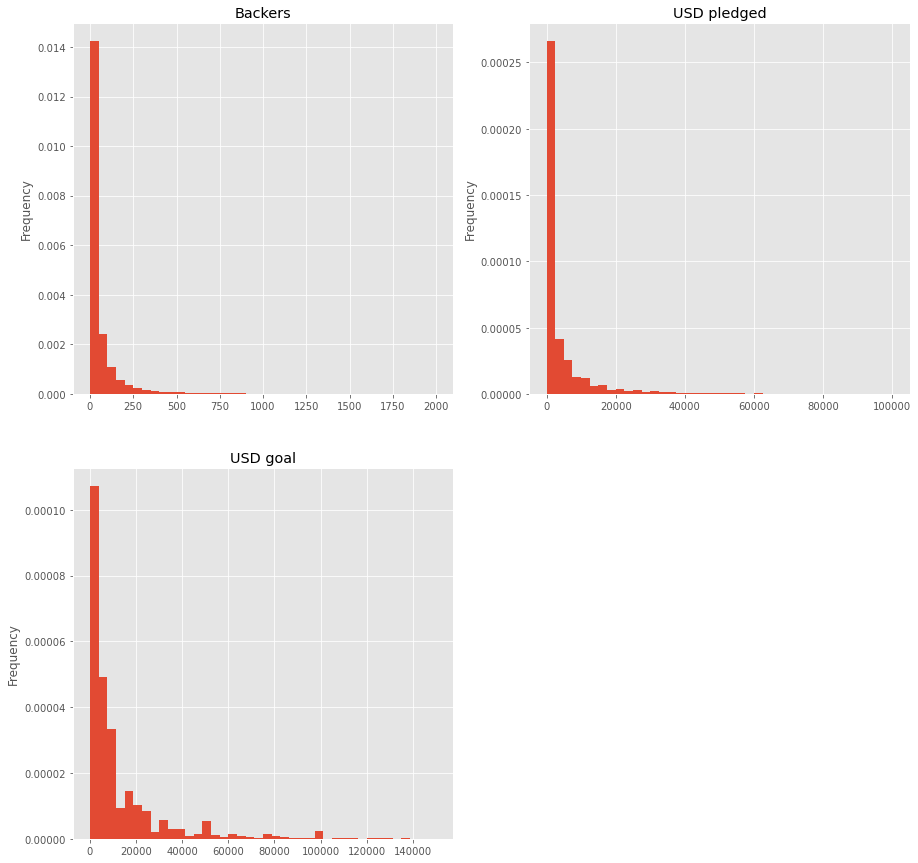

In [98]:
fig = plt.figure(figsize=(15, 15))

ax2 = fig.add_subplot(222)
ax2.set_title("USD pledged")
data["usd_pledged_real"].loc[data["usd_pledged_real"] < 100000].plot.hist(density=True, bins=40, ax=ax2)

ax3 = fig.add_subplot(223)
ax3.set_title("USD goal")
ax3.ticklabel_format(style='plain')
data["usd_goal_real"].loc[data["usd_goal_real"] < 150000].plot.hist(density=True, bins=40, ax=ax3)

ax1 = fig.add_subplot(221)
ax1.set_title("Backers")
data["backers"].loc[data["backers"] < 2000].plot.hist(density=True, bins=40, ax=ax1)

## Date value ranges

In [32]:
deadline = data['deadline'].astype('datetime64[ns]')
deadline.describe()

count                  331675
unique                   3102
top       2014-08-08 00:00:00
freq                      612
first     2009-05-03 00:00:00
last      2018-01-02 00:00:00
Name: deadline, dtype: object

In [28]:
launched = data['launched'].astype('datetime64[ns]')
launched.describe()

count                  331675
unique                 331255
top       2012-04-10 00:47:19
freq                        2
first     2009-04-21 21:02:48
last      2017-12-29 03:22:32
Name: launched, dtype: object

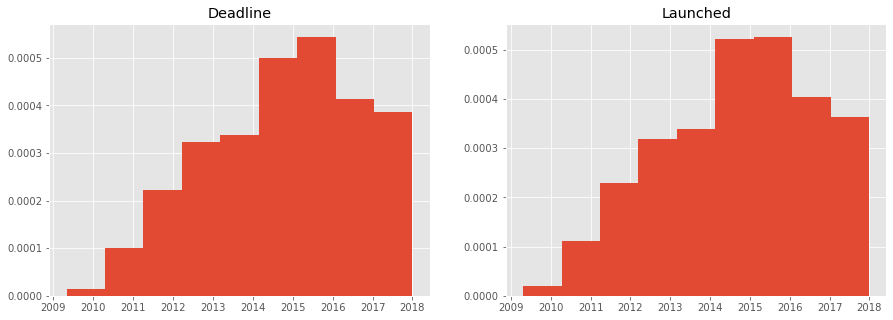

In [99]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(121)
ax1.set_title("Deadline")
deadline.hist(bins=9, density=True, ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_title("Launched")
launched.hist(bins=9, density=True, ax=ax2)

## Finding problems in data

### Values where there are backers but pledged sum is zero

In [59]:
data.loc[(data["backers"] != 0) & (data["usd_pledged_real"] == 0)]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real


### Values where goal is 0

In [61]:
data.loc[data["usd_goal_real"] == 0]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real


### Not two-letter country codes

In [64]:
data.loc[data["country"].str.len() != 2]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
2457,1012744036,An Oratorio for our Time - Last Stop Cafe,Music,Music,USD,2016-05-26,2016-04-26 19:46:26,successful,0,"N,0""",5170.00,5000.00
4892,1024989802,Jackson Ruby: The Cassette Album,Music,Music,USD,2016-05-11,2016-04-11 19:29:17,successful,0,"N,0""",5296.00,5000.00
5353,1027275369,Help Parker Brown make his first solo album,Music,Music,USD,2016-05-21,2016-04-21 16:14:28,successful,0,"N,0""",5077.00,3800.00
5597,1028691308,Help BETHANY record a NEW single in Nash!,Music,Music,USD,2016-05-08,2016-04-04 23:32:00,successful,0,"N,0""",3502.13,3500.00
8260,1041708793,Serena Gabriel's first CD!!!!!!: Diving Deep,Music,Music,USD,2016-05-01,2016-03-25 17:20:21,successful,0,"N,0""",3787.00,3500.00
...,...,...,...,...,...,...,...,...,...,...,...,...
368889,949401487,A Taste of San Diego's Singer Songwriters,Music,Music,USD,2016-05-09,2016-04-09 02:21:45,failed,0,"N,0""",1408.00,7500.00
371387,962477474,Spoken Fruit Magazine,Print,Journalism,EUR,2016-04-28,2016-03-29 16:02:57,failed,0,"N,0""",2204.21,17104.54
372375,967557880,Help Danelle Finish Her First EP Album,Music,Music,USD,2016-04-28,2016-04-05 18:56:21,successful,0,"N,0""",3686.00,3500.00
375359,982919439,Faith,Film & Video,Film & Video,USD,2016-05-06,2016-03-07 04:17:33,failed,0,"N,0""",2.00,9000.00


### Not three-letter currency codes

In [66]:
data.loc[data["currency"].str.len() != 3]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real


### Empty title

In [73]:
data.loc[data["name"].isnull()]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,2012-01-01 12:35:31,failed,1,US,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97
338931,796533179,NaN,Painting,Art,USD,2011-12-05,2011-11-06 23:55:55,failed,5,US,220.00,35000.00


### Negative backer amount

In [85]:
data.loc[(data["backers"] < 0)]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real


### One backer and goal is reached

In [86]:
data.loc[(data["backers"] == 1) & (data["usd_pledged_real"] >= data["usd_goal_real"])]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
513,1002478333,"Natural face, feet, and body scrubs",Crafts,Crafts,USD,2016-01-18,2015-12-19 01:01:55,successful,1,US,120.00,120.00
2453,101272268,Writing a children's book for my stepdaughter,Nonfiction,Publishing,USD,2015-12-06,2015-11-06 04:00:21,successful,1,US,200.00,200.00
3053,1015780858,"Caleb Mikesell - Music Video: ""Be Okay""",Music,Music,USD,2012-10-24,2012-10-04 20:29:23,successful,1,US,100.00,100.00
5112,1026101666,Idyll - Psychological Horror/Thriller,Horror,Film & Video,USD,2014-11-19,2014-11-05 01:41:24,successful,1,US,400.00,400.00
6641,1033845447,Spookmart's Halloween 2017 Preorder,Festivals,Theater,USD,2017-04-18,2017-03-19 15:45:47,successful,1,US,19.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...
374027,976013614,Retribution (Action Short Film),Film & Video,Film & Video,USD,2015-06-18,2015-06-03 02:23:18,successful,1,US,52.00,50.00
374385,977866346,Down Home Bread,Food,Food,USD,2014-08-04,2014-07-09 00:53:38,successful,1,US,10.00,10.00
374874,980486817,A trip to Prague,Documentary,Film & Video,EUR,2016-03-07,2016-01-07 19:24:30,successful,1,BE,56.56,55.45
376147,987224237,Hexogen - A Game that's Taking Roblox to a New...,Video Games,Games,USD,2017-02-05,2017-02-01 23:22:11,successful,1,US,1005.00,1000.00


### Negative pledged amount

In [78]:
data.loc[data["usd_pledged_real"] < 0]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real


### Negative goal amount

In [79]:
data.loc[data["usd_goal_real"] < 0]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real


### Really small goal amount

In [96]:
data.loc[data["usd_goal_real"] < 20]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
306,1001352451,The Great Apple Pie,Farmer's Markets,Food,CAD,2014-08-15,2014-07-16 05:03:30,failed,2,CA,5.50,13.76
363,1001685760,Wholesters- A new way to Whold your things!,Fashion,Fashion,USD,2011-05-29,2011-04-29 01:03:16,successful,3,US,566.00,1.00
532,1002571103,3mm Aluminum Pick Plectrum,Music,Music,CAD,2014-03-24,2014-02-22 23:28:33,successful,9,CA,18.12,0.91
565,1002728217,Free soap from starting soap maker!,Crafts,Crafts,USD,2014-08-19,2014-07-20 07:38:32,successful,16,US,36.00,10.00
993,1005030157,Tons Of Music For A Buck!!!,Rock,Music,USD,2015-08-15,2015-07-16 23:41:20,successful,13,US,113.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
377441,993961188,SWEET LITTLE BITTER by BAD REED,Rock,Music,CAD,2017-05-20,2017-04-20 16:34:05,successful,42,CA,1485.22,0.74
377757,995538414,Make a Tomato Pie !,Food,Food,USD,2014-09-14,2014-07-16 19:16:03,successful,8,US,27.00,10.00
378342,998486147,Half Bloods Series,Drama,Film & Video,USD,2016-04-17,2016-03-17 03:57:51,failed,0,US,0.00,1.00
378430,998849014,A picture is worth a bunch of words,Nature,Photography,USD,2015-03-20,2015-02-18 20:38:44,successful,1,US,1.00,1.00


In [113]:
data.loc[(data["usd_goal_real"] > 1000000) & (data["backers"] < 3)]

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
340,1001542282,You in a novel,Publishing,Publishing,EUR,2015-11-09,2015-09-10 23:03:21,failed,1,IT,10.76,1076403.09
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-10-14,2014-08-15 20:16:22,failed,2,US,4.00,3000000.00
1144,1005820080,The Million Pound Shirt,Fashion,Fashion,GBP,2015-11-25,2015-10-21 22:00:04,failed,1,GB,15.05,1505185.36
2993,1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,2015-07-07 21:14:52,failed,0,IT,0.00,5568982.99
3271,1016899157,Musée du cirque Gilles MAIGNANT : NICE CIRCUS ...,Performance Art,Art,EUR,2015-10-25,2015-08-26 19:38:53,failed,1,FR,110.17,1101697.72
...,...,...,...,...,...,...,...,...,...,...,...,...
375942,986066275,HalalAdvisor Ltd,Apps,Technology,EUR,2017-10-18,2017-09-18 12:54:53,failed,0,BE,0.00,1181795.62
376558,989211115,Project Real Estate Support System #8,Web,Technology,AUD,2017-09-17,2017-07-19 11:42:10,failed,2,AU,23.90,2151394.42
376985,991488706,The Murder of Count Martini,Thrillers,Film & Video,EUR,2017-07-19,2017-06-14 19:43:53,failed,0,IT,0.00,24448169.88
377201,992624421,I don't know a comic book?,Comics,Comics,USD,2014-08-09,2014-07-10 06:11:48,failed,1,US,10.00,10000000.00
